<a href="https://colab.research.google.com/github/axndyg/sagb_inrto_project/blob/main/France_Fouls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
france = pd.read_csv("/content/events_France.csv")

In [199]:
fouls_france = france[france['eventName'] == 'Foul']
fouls_france = fouls_france[['eventId', 'subEventName', 'matchId', 'teamId', 'matchPeriod', 'eventSec']]

In [200]:
fouls_france["eventSec"] = np.where(fouls_france["matchPeriod"] == "2H", fouls_france["eventSec"] + 2700, fouls_france["eventSec"])

In [221]:
fouls = fouls_france[['eventId', 'subEventName', 'matchId', 'teamId', 'eventSec']]
fouls["eventMin"] = fouls["eventSec"] / 60
fouls.head()

,eventId,subEventName,matchId,teamId,eventSec,eventMin
38,2,Foul,2500686,3799,68.621397,1.143690
70,2,Foul,2500686,3772,173.279043,2.887984
271,2,Foul,2500686,3799,780.411047,13.006851
397,2,Foul,2500686,3772,1189.224805,19.820413
424,2,Foul,2500686,3799,1259.367422,20.989457


In [190]:
fouls_by_game = fouls.groupby("matchId")['eventMin'].apply(list).to_dict()


In [204]:
france_fouls = pd.DataFrame({'matchId': list(fouls_by_game.keys()), 'fouls': list(fouls_by_game.values())})


In [209]:
fouls_per_game = france_fouls['fouls'].apply(len).tolist()
fouls_by_game_late = france_fouls['fouls'].apply(lambda x: len([i for i in x if i >= 45])).tolist()
fouls_by_game_first = france_fouls['fouls'].apply(lambda x: len([i for i in x if i < 45])).tolist()


In [214]:
france_fouls["total fouls"] = fouls_per_game
france_fouls["fouls in second half"] = fouls_by_game_late
france_fouls["fouls in first half"] = fouls_by_game_first

france_fouls["first half foul density"] =  france_fouls["fouls in first half"] / france_fouls["total fouls"]
france_fouls["second half foul density"] =  france_fouls["fouls in second half"] / france_fouls["total fouls"]

In [215]:
france_fouls

,matchId,fouls,total fouls,fouls in second half,second half foul density,fouls in first half,first half foul density
0,2500686,"[1.0, 3.0, 13.0, 20.0, 21.0, 23.0, 31.0, 31.0,...",32,19,0.593750,13,0.406250
1,2500687,"[9.0, 13.0, 17.0, 23.0, 25.0, 27.0, 32.0, 35.0...",29,19,0.655172,10,0.344828
2,2500688,"[10.0, 10.0, 15.0, 24.0, 27.0, 28.0, 30.0, 36....",26,14,0.538462,12,0.461538
3,2500689,"[1.0, 6.0, 7.0, 12.0, 14.0, 15.0, 35.0, 42.0, ...",18,10,0.555556,8,0.444444
4,2500690,"[6.0, 7.0, 17.0, 19.0, 19.0, 27.0, 33.0, 33.0,...",21,8,0.380952,13,0.619048
...,...,...,...,...,...,...,...
375,2501061,"[6.0, 8.0, 16.0, 27.0, 35.0, 39.0, 44.0, 49.0,...",18,11,0.611111,7,0.388889
376,2501062,"[10.0, 19.0, 21.0, 23.0, 27.0, 28.0, 29.0, 31....",22,13,0.590909,9,0.409091
377,2501063,"[8.0, 14.0, 15.0, 20.0, 35.0, 38.0, 46.0, 58.0...",11,5,0.454545,6,0.545455
378,2501064,"[2.0, 4.0, 7.0, 16.0, 18.0, 23.0, 30.0, 33.0, ...",23,13,0.565217,10,0.434783


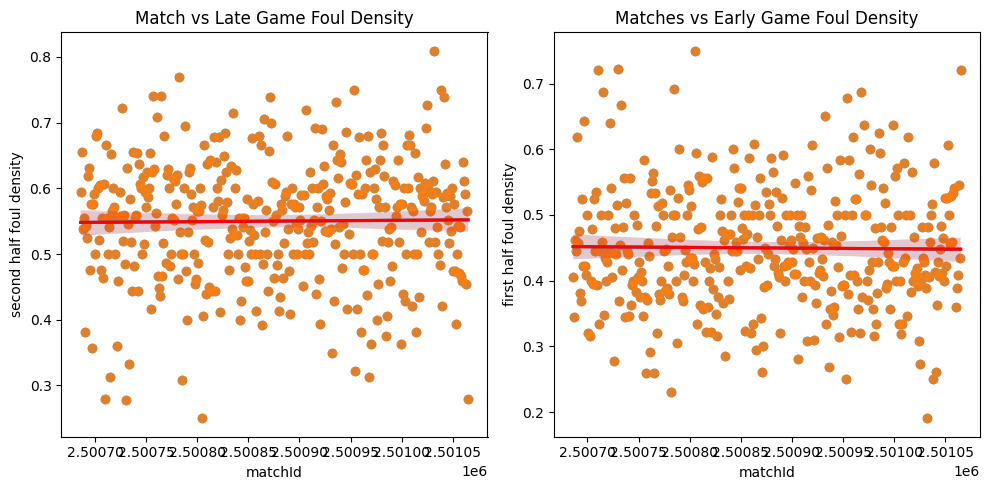

In [219]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1
sns.regplot(x="matchId", y="second half foul density", data=france_fouls, ax=axs[0])
axs[0].set_xlabel('Matches')
axs[0].set_ylabel('Late Game Foul Density')
axs[0].set_title('Match vs Late Game Foul Density')

# Plot 2
sns.regplot(x="matchId", y="first half foul density", data=france_fouls, ax=axs[1])
axs[1].set_xlabel('Matches')
axs[1].set_ylabel('Early Game Foul Density')
axs[1].set_title('Matches vs Early Game Foul Density')

# Adjust spacing between subplots
plt.tight_layout()
sns.regplot(x="matchId", y="second half foul density", data=france_fouls, ax=axs[0], line_kws={"color": "red"})
sns.regplot(x="matchId", y="first half foul density", data=france_fouls, ax=axs[1], line_kws={"color": "red"})

# Display the plots
plt.show()